In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

sns.set(style="whitegrid")  # Set seaborn style


In [3]:
df=pd.read_csv("transaction.csv")

In [4]:
df.head()

,Unnamed: 0,Transaction_ID,Date,Customer_Name,Total_Items,Amount($),Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Month
0,0,1000667075,2022-09-12T17:40:23.000,David King,5,30.98,Debit Card,Chicago,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One),September
1,1,1000156022,2022-01-20T23:03:20.000,Michael Williamson,3,23.29,Credit Card,Boston,Warehouse Club,True,Homemaker,Winter,Discount on Selected Items,January
2,2,1000681674,2022-10-15T07:49:59.000,Chelsea Garza,7,25.62,Debit Card,Chicago,Pharmacy,False,Teenager,Fall,Discount on Selected Items,October
3,3,1000692089,2024-04-05T09:39:58.000,Scott Lopez,5,14.64,Mobile Payment,Atlanta,Pharmacy,False,Homemaker,Summer,Discount on Selected Items,April
4,4,1000328702,2021-05-28T04:16:54.000,Crystal Adams,4,62.27,Credit Card,Miami,Convenience Store,False,Retiree,Summer,No Promotion,May


In [7]:
#check null value
df.isna().sum()

Unnamed: 0           0
Transaction_ID       0
Date                 0
Customer_Name        0
Total_Items          0
Amount($)            0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
Month                0
dtype: int64

In [9]:
#total transactions
total_transactions=df.shape[0]
total_transactions

38500

In [10]:
#total customers
total_customers=df["Customer_Name"].nunique()
total_customers


32241

In [11]:
#average purchases
average_purchases=df["Amount($)"].mean()
average_purchases

np.float64(52.459843116883114)

In [14]:
#discounted purchases
discounted_purchase_total = df[df["Discount_Applied"] == True]["Amount($)"].sum()
print("discounted_pruchases : $",discounted_purchase_total)

discounted_pruchases : $ 1022221.08


In [15]:
#avg.item per transactions
avg_items_per_transaction=df["Total_Items"].mean()
avg_items_per_transaction

np.float64(5.490649350649351)

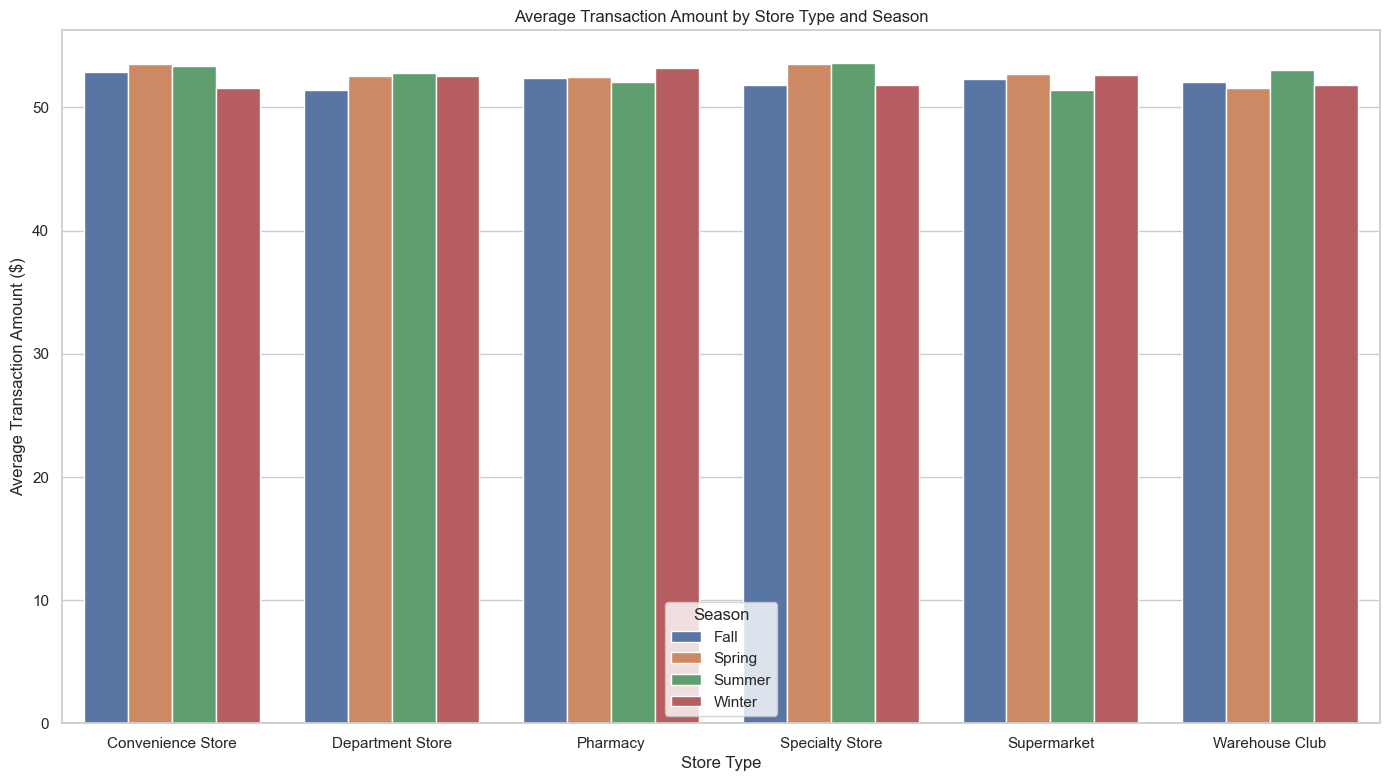

In [ ]:
ransaction amount by s#average ttore type and season 

avg_transaction_by_store_season = df.groupby(['Store_Type', 'Season'])['Amount($)'].mean().reset_index()

plt.figure(figsize=(17, 9))
sns.barplot(data=avg_transaction_by_store_season, x='Store_Type', y='Amount($)', hue='Season')

plt.title('Average Transaction Amount by Store Type and Season')
plt.xlabel('Store Type')
plt.ylabel('Average Transaction Amount ($)')
plt.legend(title='Season')

plt.show()



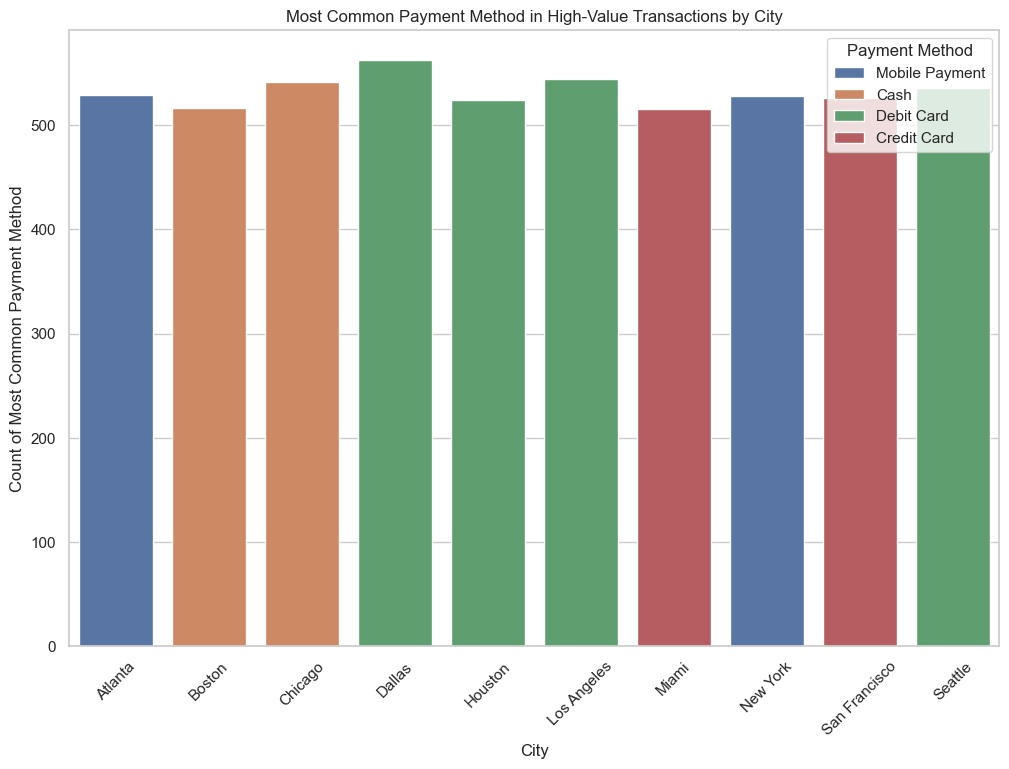

In [ ]:
#Most Common Payment Method in High-Value Transactions by City
high_value_threshold = 50
high_value_df = df[df['Amount($)'] > high_value_threshold]
payment_by_city = high_value_df.groupby(['City', 'Payment_Method']).size().reset_index(name='Count')
most_common_payment_by_city = payment_by_city.loc[payment_by_city.groupby('City')['Count'].idxmax()]

plt.figure(figsize=(12, 8))
sns.barplot(data=most_common_payment_by_city, x='City', y='Count', hue='Payment_Method')
plt.title('Most Common Payment Method in High-Value Transactions by City')
plt.xlabel('City')
plt.ylabel('Count of Most Common Payment Method')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)
plt.show()

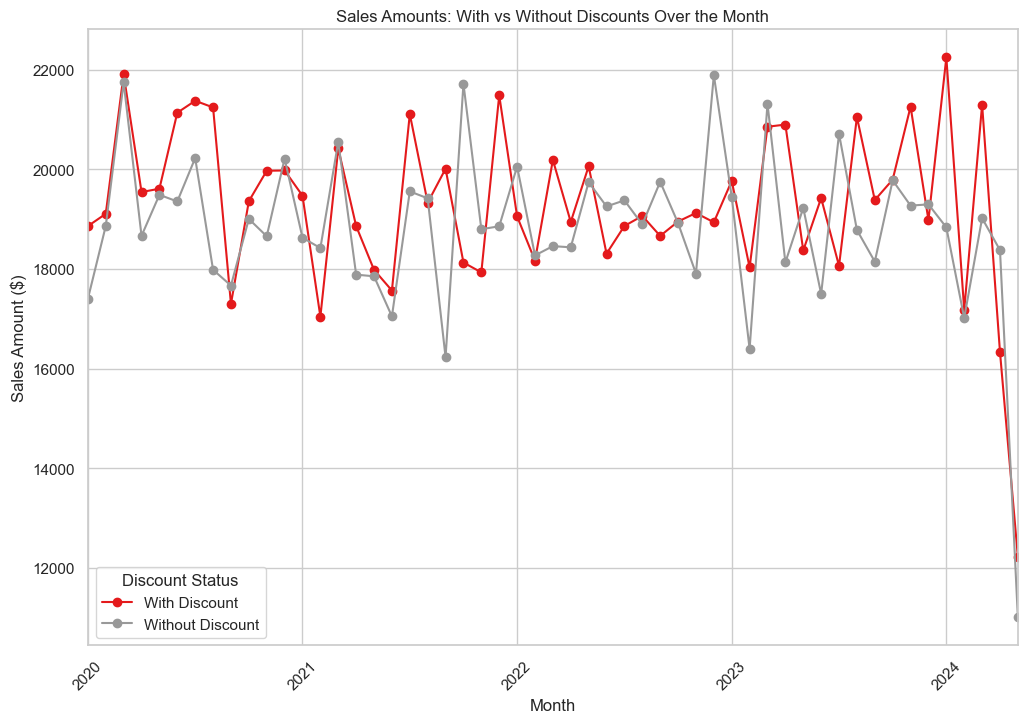

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

with_discount = df[df['Discount_Applied'] == True]
without_discount = df[df['Discount_Applied'] == False]

sales_with_discount = with_discount.groupby('Month')['Amount($)'].sum()
sales_without_discount = without_discount.groupby('Month')['Amount($)'].sum()

sales_comparison = pd.DataFrame({
    'With Discount': sales_with_discount,
    'Without Discount': sales_without_discount
})

sales_comparison.plot(kind='line', figsize=(12, 8), marker='o', colormap='Set1')

plt.title('Sales Amounts: With vs Without Discounts Over the Month')
plt.xlabel('Month')
plt.ylabel('Sales Amount ($)')
plt.xticks(rotation=45)
plt.legend(title='Discount Status')
plt.grid(True)
plt.show()

In [2]:
#Average Items per Transaction & Sales by Season
df['Date'] = pd.to_datetime(df['Date'])

df['Items'] = df['Total_Items']
average_items_per_transaction = df.groupby('City')['Items'].sum() / df.groupby('City')['Transaction_ID'].nunique()

sales_by_season = df.groupby(['Season', 'City'])['Amount($)'].sum().unstack(fill_value=0)

top_cities_avg_items = average_items_per_transaction.sort_values(ascending=False).head(10)
top_cities_sales = sales_by_season.sum(axis=0).sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_cities_avg_items.plot(kind='bar', color='skyblue')
plt.title('Top Cities by Average Items per Transaction')
plt.xlabel('City')
plt.ylabel('Average Items per Transaction')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sales_by_season[top_cities_sales.index].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sales by Season for Top Cities')
plt.xlabel('Season')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.show()

NameError: name 'pd' is not defined

Season Winter: F-statistic = 0.9657361958723601, P-value = 0.3807439539048968
Season Spring: F-statistic = 0.3706332377586314, P-value = 0.6903063945953836
Season Summer: F-statistic = 1.4169699568976395, P-value = 0.24249264246499141
Season Fall: F-statistic = 0.9729311768233548, P-value = 0.3780137163189111


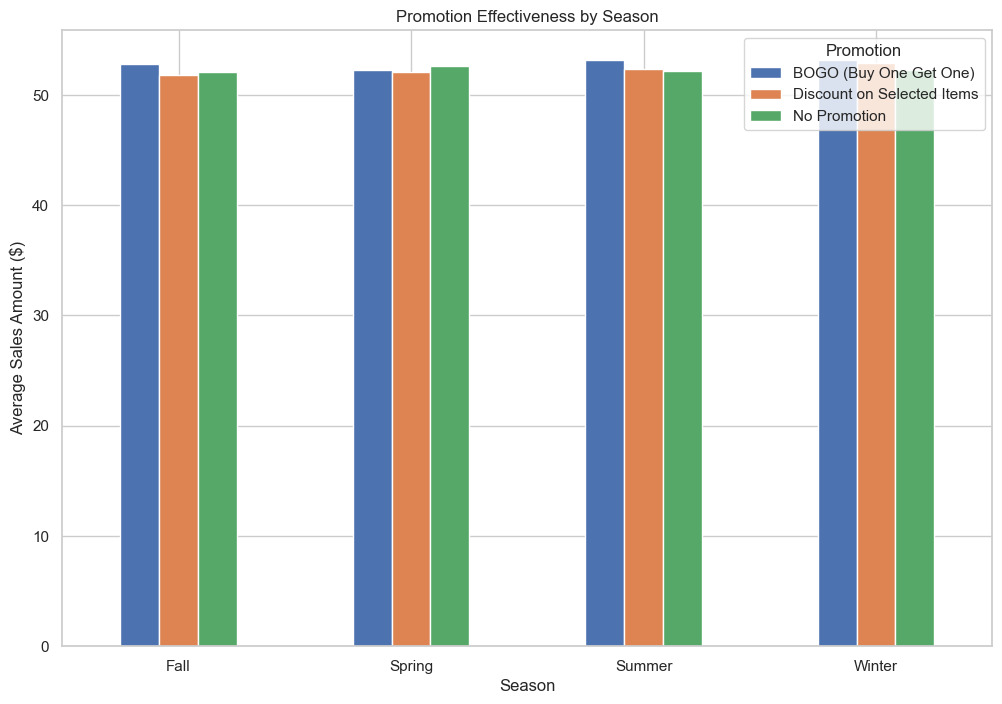

In [53]:
df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].dt.month % 12 // 3 + 1

season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['Season_Name'] = df['Season'].map(season_names)

promotion_season_data = df.groupby(['Season_Name', 'Promotion'])['Amount($)'].mean().reset_index()

promotion_effectiveness_by_season = {}

for season in df['Season_Name'].unique():
    season_data = df[df['Season_Name'] == season]
    promotion_groups = [season_data[season_data['Promotion'] == promotion]['Amount($)'] for promotion in season_data['Promotion'].unique()]
    f_stat, p_val = stats.f_oneway(*promotion_groups)
    promotion_effectiveness_by_season[season] = (f_stat, p_val)

for season, (f_stat, p_val) in promotion_effectiveness_by_season.items():
    print(f"Season {season}: F-statistic = {f_stat}, P-value = {p_val}")

significant_promotions = {season: (f_stat, p_val) for season, (f_stat, p_val) in promotion_effectiveness_by_season.items() if p_val < 0.05}

promotion_season_data.pivot(index='Season_Name', columns='Promotion', values='Amount($)').plot(kind='bar', figsize=(12, 8))

plt.title('Promotion Effectiveness by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales Amount ($)')
plt.xticks(rotation=0)
plt.legend(title='Promotion')
plt.show()